# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Название колонок датафрейма**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # сниму ограничение на отображаемое кол-во столбцов

data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
print('Общая информация')
data.info()
print()
print('Колонки')
print(data.columns)

display(data.head(30))



Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  ai

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [21]:
display(data.tail(30))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23669,8,3000000.0,34.10,2017-11-10T00:00:00,1,NaN,9.0,17.0,3,NaN,False,False,9.00,1.0,Колпино,24687.0,30473.0,0.0,NaN,1.0,741.0,74.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23671,3,3450000.0,35.30,2017-04-14T00:00:00,1,2.50,9.0,17.5,4,False,False,False,7.50,2.0,Санкт-Петербург,21435.0,15261.0,1.0,334.0,1.0,232.0,21.0
23672,5,3000000.0,30.80,2016-06-08T00:00:00,1,NaN,5.0,16.1,3,NaN,False,False,6.30,NaN,Санкт-Петербург,44614.0,14193.0,2.0,258.0,0.0,NaN,808.0
23673,9,3100000.0,23.00,2018-03-19T00:00:00,1,2.80,9.0,12.6,1,NaN,False,False,5.00,2.0,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0
23674,10,5950000.0,56.00,2019-03-05T00:00:00,3,NaN,8.0,32.1,3,NaN,False,False,8.50,NaN,Санкт-Петербург,32139.0,9217.0,0.0,NaN,2.0,303.0,NaN
23675,8,3550000.0,39.50,2016-10-03T00:00:00,1,NaN,16.0,19.0,13,NaN,False,False,8.50,NaN,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0
23676,19,3550000.0,36.40,2016-06-08T00:00:00,1,NaN,16.0,14.9,13,NaN,False,False,9.30,0.0,Санкт-Петербург,32228.0,11884.0,1.0,701.0,0.0,NaN,70.0
23677,8,2450000.0,35.00,2018-10-26T00:00:00,1,2.60,5.0,18.0,4,NaN,False,False,9.60,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.0
23678,10,3500000.0,43.00,2016-05-19T00:00:00,2,2.50,3.0,26.1,2,False,False,False,4.90,1.0,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

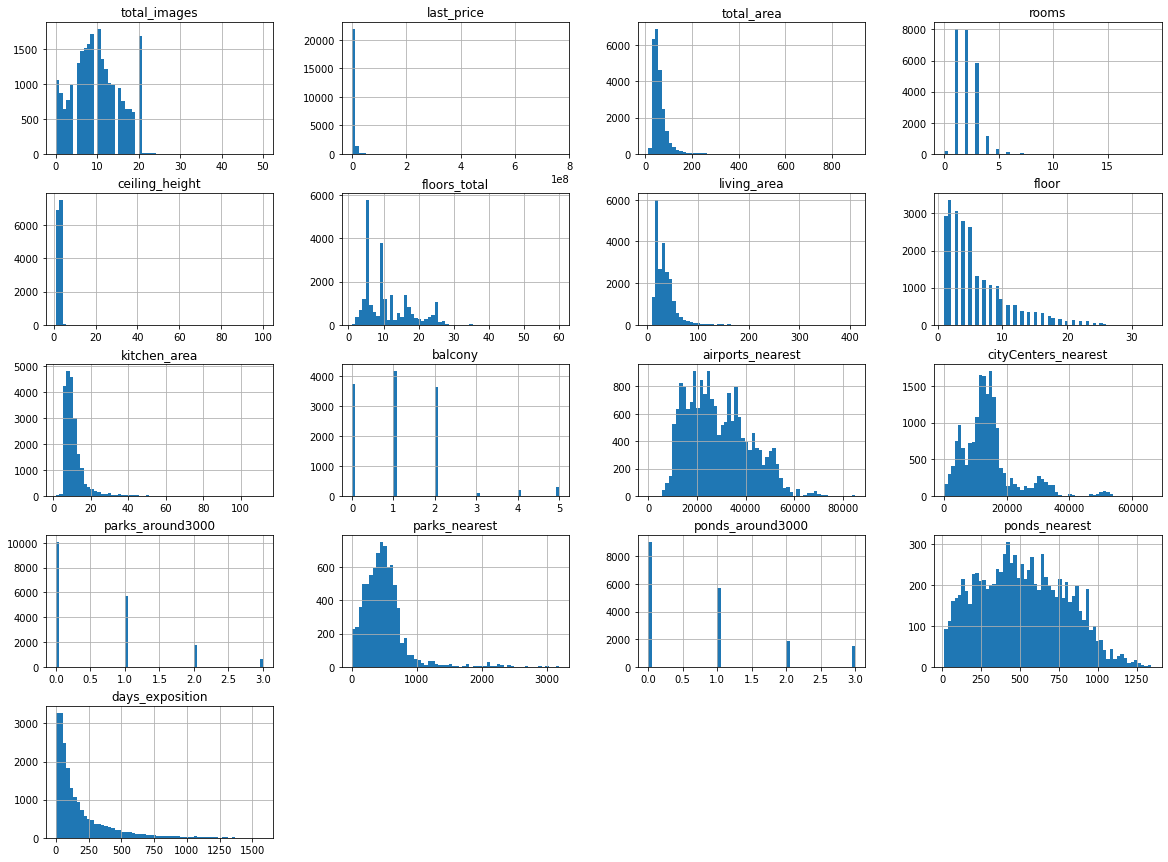

In [22]:
data.hist(bins = 60, figsize=(20, 15))

### Предобработка данных

Во многих столбцах были найдены пропущенные значения.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [24]:
#Проверяю кол-во пропущенных значений в каждом столбце.
data.isnull().sum().sort_values()



total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [25]:
# заполню пропущеные значения в столбце balcony нулями
data['balcony'] = data['balcony'].fillna(0)

#также заполню нулями количество водоёмов и парков в радиусе 3 км

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

# пришлось ещё удалить строки, где не указан номер этажа, т.к. у него ещё неправильный тип данных 
# и пропуски мешали перевести его в нормальный
data.drop(data[data['floors_total'].isna()].index, inplace=True)

data.isnull().sum().sort_values()
#data.info()


total_images                0
ponds_around3000            0
parks_around3000            0
balcony                     0
open_plan                   0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
locality_name              48
living_area              1870
kitchen_area             2231
days_exposition          3172
cityCenters_nearest      5509
airports_nearest         5532
ceiling_height           9118
ponds_nearest           14552
parks_nearest           15568
is_apartment            20838
dtype: int64

**Вывод по пропускам**

Пропуски могли появиться из-за того, что продавцы просто не знали есть ли в радиусе 3км водоёмы и парки, а также параметры квартир (возможно квартиры продают дистанционно), так же отсутсвующие балконы могли просто не внести в список. 

**2. Проверяем тип данных**

In [26]:
print(data.dtypes)
display(data.head(20))

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [27]:
data['last_price'] = data['last_price'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int64')
#data['airports_nearest'] = data['airports_nearest'].astype('int64')


print(data.dtypes)


total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


**Зачем надо изменять тип данных**

Изменения типов данных нужен для коректного расчёта (особено если у нас присутствуют булевские значения, а они определяются как текст). Без правильного типа данных провести некоторые иследования не представится возможным

**3. Устранения неявных дубликатов**

In [28]:
#display(data.head(30))

# вывожу уникальные значения столбца 

data['locality_name'].unique().tolist()


['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [29]:
# вывожу кол-во уникальных значений

len(data['locality_name'].unique())

365

In [30]:
# меняю ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

len(data['locality_name'].unique())

331

In [31]:
#переименовываю названия содержащие "поселок" на одно название "поселок"
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
len(data['locality_name'].unique())

322

**Вывод П.3**

Избавился от 43 неявных дубликатов.

**4. Редкие и выбивающиеся значения** 

In [32]:
#Получаю список уникальных значений 

data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [33]:
# В данных есть значения высоты потолков которые равны нескольким десяткам метров. 
# Скорей всего неправильно выставлена десятичная часть, поэтому я отфильтрую значения больше или равные 10 и поделю их на 10

data.loc[(data['ceiling_height'] >= 10), 'ceiling_height'] = data['ceiling_height']/10

data.groupby('ceiling_height')['ceiling_height'].count().tail(40)


ceiling_height
3.78      3
3.80     20
3.82      1
3.83      1
3.84      1
3.85      2
3.86      2
3.87      1
3.88      1
3.90     14
3.93      1
3.95      8
3.98      1
4.00     39
4.06      1
4.10      3
4.14      1
4.15      1
4.19      2
4.20     10
4.25      1
4.30      1
4.37      1
4.40      3
4.45      2
4.50      7
4.65      1
4.70      2
4.80      1
4.90      1
5.00      1
5.20      1
5.30      2
5.50      1
5.60      1
5.80      1
6.00      1
8.00      3
8.30      1
10.00     1
Name: ceiling_height, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,True,False,False,9.10,0,поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

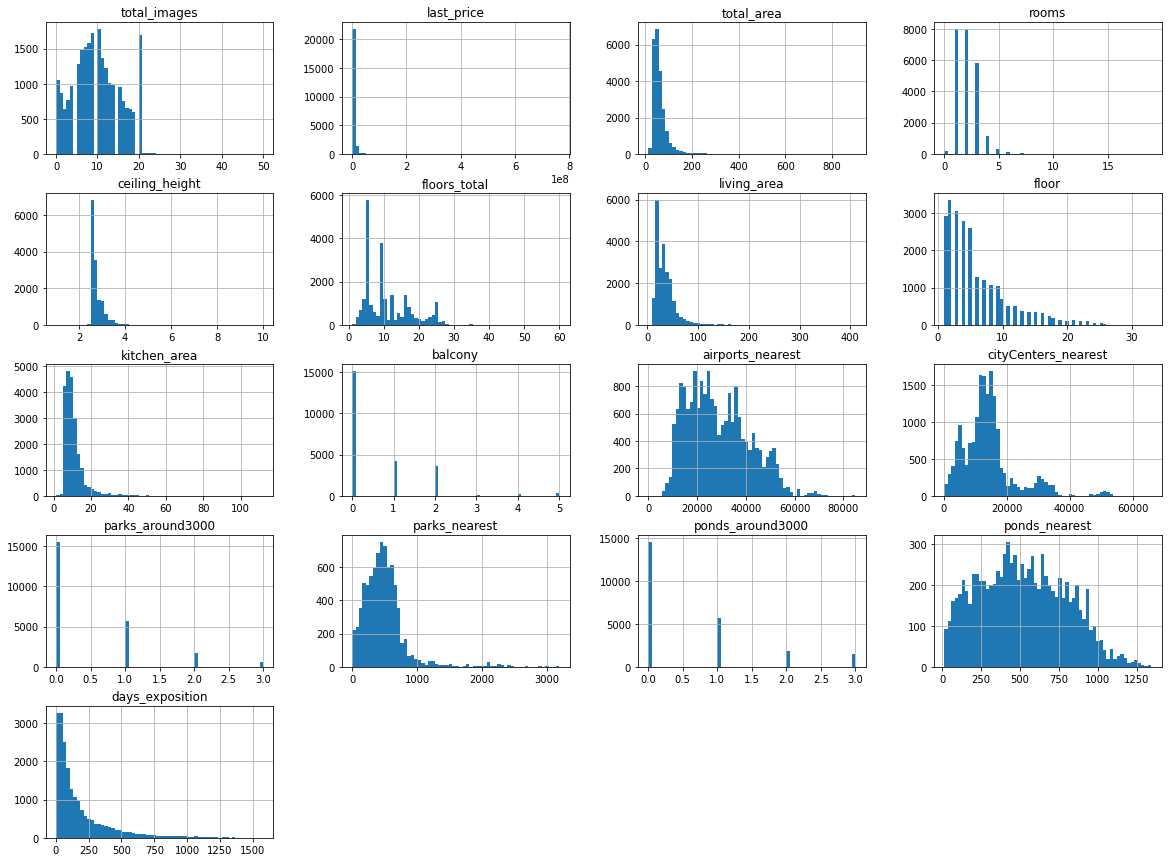

In [34]:
# Выведу ещё раз таблицу с гистограммами по каждому значению
display(data.head(60))

data.hist(bins = 60, figsize=(20, 15))


In [35]:
# проверяю на явные дубликаты

data.duplicated().sum()

# явных дупликатов нету

0

**Вывод П.4**

Были обнаружены выбивающиеся значения в столбце `ceiling_height`. Значения были исправлены, путем математической операции. 
В остальных гистограммах значения, которые бы выходили за разумные пределы не обнаружены.

# Вывод по предобработке

- В ходе работы были заполнены пропуски в столбце `balcony`.
- удалены 43 неявных дубликата в столбце `locality_name`
- исправлены значения в столбце `ceiling_height`

### Посчитайте и добавьте в таблицу новые столбцы

In [36]:
display(data.tail(60))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23638,8,4920000,76.26,2014-12-25T00:00:00,3,NaN,15,42.55,13,True,False,False,10.18,0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,939.0
23639,12,4250000,64.90,2018-11-14T00:00:00,2,2.80,5,39.00,5,True,False,False,10.00,2,поселок Шушары,18041.0,30047.0,0.0,NaN,1.0,559.0,124.0
23640,14,2440000,34.70,2017-12-25T00:00:00,1,2.60,6,14.60,6,True,False,False,12.50,1,поселок Шушары,18370.0,24172.0,0.0,NaN,0.0,NaN,124.0
23641,3,3100000,30.00,2018-03-28T00:00:00,1,2.50,5,17.00,5,True,False,False,5.00,0,Колпино,24056.0,29843.0,0.0,NaN,0.0,NaN,10.0
23642,14,5950000,80.30,2018-07-03T00:00:00,3,2.70,12,NaN,5,True,False,False,NaN,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23643,1,660000,45.00,2019-02-19T00:00:00,2,NaN,5,31.00,4,False,False,False,6.00,1,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23644,7,4990000,62.50,2018-04-26T00:00:00,2,2.70,4,32.30,4,True,False,False,12.10,0,Санкт-Петербург,20141.0,4415.0,1.0,560.0,1.0,171.0,166.0
23645,5,1350000,40.70,2019-04-04T00:00:00,1,2.50,3,18.50,1,True,False,False,9.00,2,поселок Елизаветино,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23646,10,8200000,68.70,2018-12-03T00:00:00,2,2.80,17,34.40,2,True,False,False,18.00,0,Санкт-Петербург,33592.0,14691.0,0.0,NaN,2.0,611.0,NaN
23647,9,5700000,45.60,2019-01-09T00:00:00,1,2.75,16,18.70,6,True,False,False,17.60,0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,8.0


In [37]:
# Добавлю столбец цены за 1 кв. м

data['price_one_area'] = data['last_price']/data['living_area']
data['price_one_area'] = data['price_one_area'].round()

# Перевожу дату в формат DateTime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
# Везде время равно 0, поэтому оно исключилось из столбца

# Разделяю дни, месяцы и года по отдельным столбцам
data['weekday']= data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year




In [38]:
#для категоризации по этажам квартир напишу функцию 

def floors_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
                
    else:
        return 'другой'

data['floors_type'] = data.apply(floors_type, axis= 1)

# проверю её работу
data['floors_type'].unique()


array(['другой', 'первый', 'последний'], dtype=object)

In [39]:
# переведу метры в столбце `cityCenters_nearest` в киллометры

data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

display(data.head(60))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_area,weekday,month,year,floors_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254902.0,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180108.0,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151487.0,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,False,False,9.10,0,поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,200694.0,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,349057.0,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,187946.0,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,123853.0,6,2,2017,другой,15.0


In [40]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'price_one_area',
 'weekday',
 'month',
 'year',
 'floors_type',
 'cityCenters_nearest_km']

### Проведите исследовательский анализ данных

**1.Изучене параметров объектов**

<AxesSubplot:title={'center':'месяц публикации объявления'}, ylabel='Frequency'>

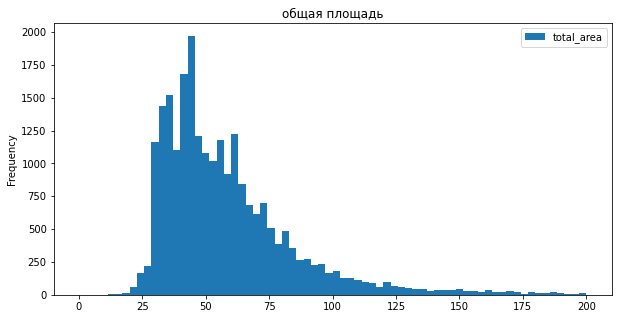

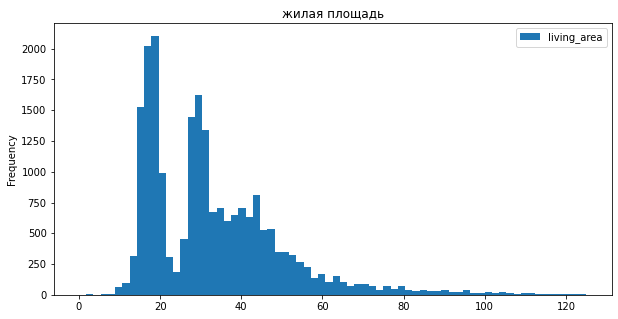

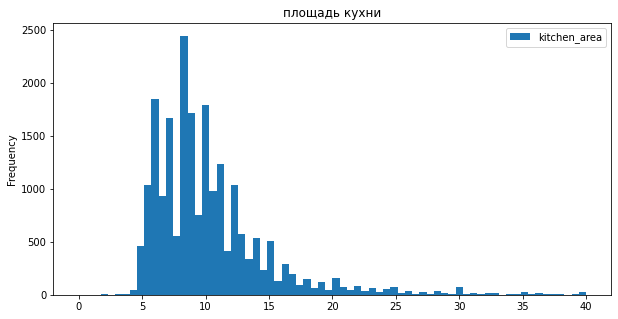

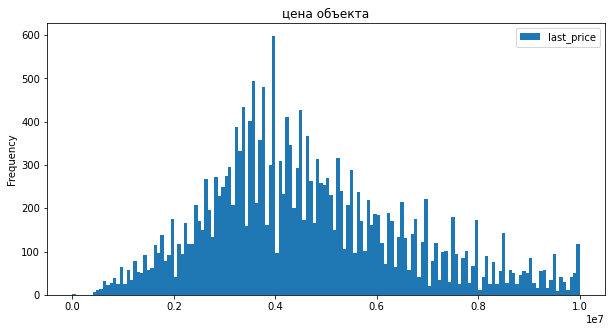

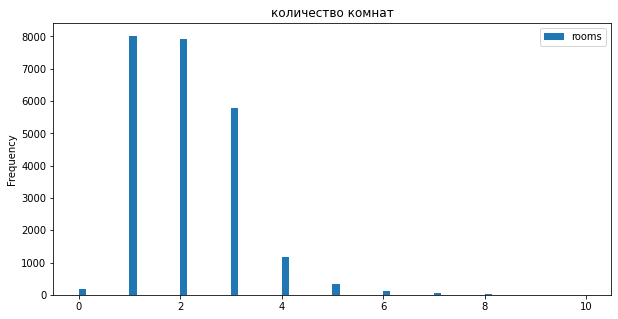

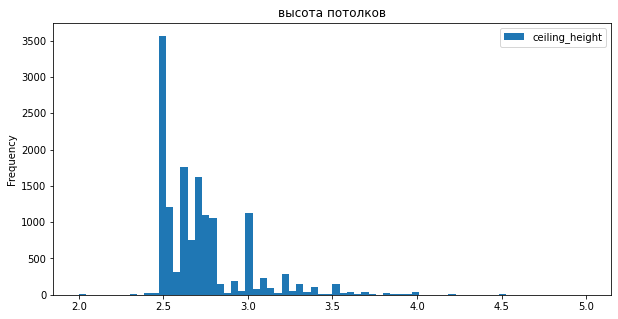

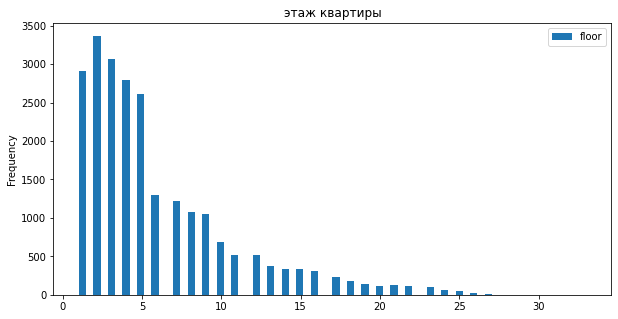

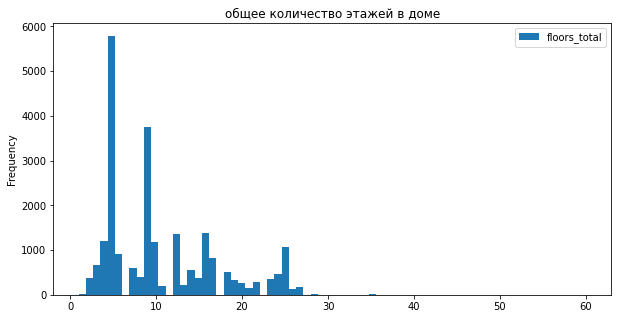

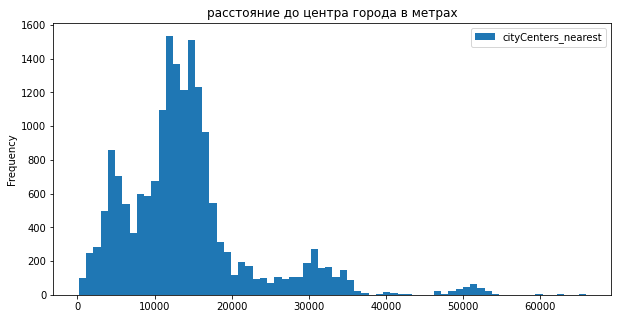

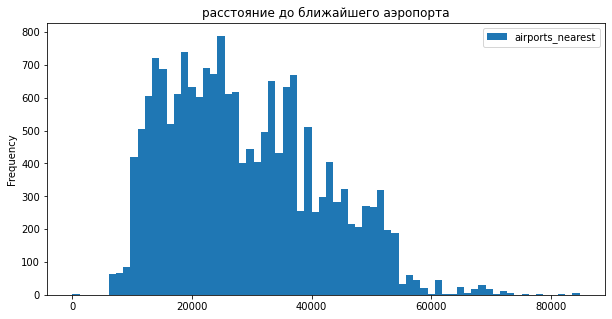

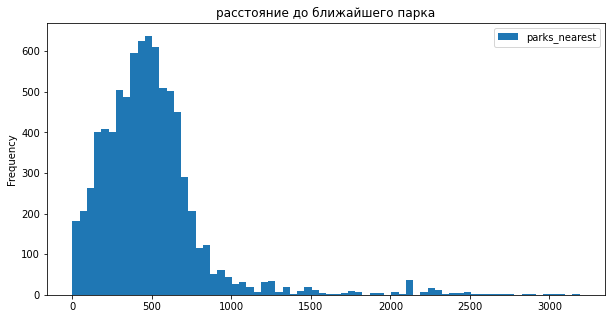

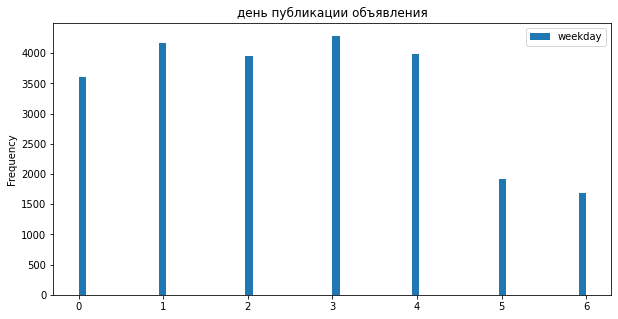

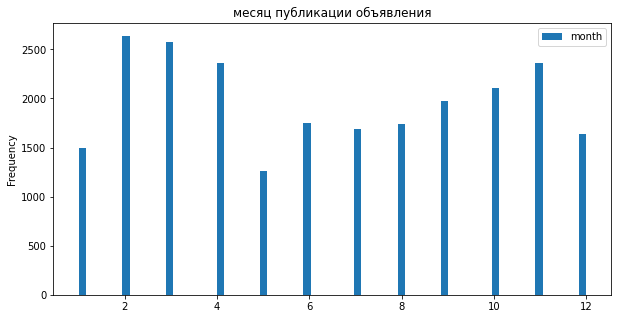

In [48]:
#data.hist(bins=60, figsize = (15, 10))

data.plot(y = 'total_area', title = 'общая площадь', kind = 'hist', bins = 70,figsize = (10, 5), range = (0, 200))
data.plot(y = 'living_area', title = 'жилая площадь', kind = 'hist', bins = 70,figsize = (10, 5), range = (0, 125))
data.plot(y = 'kitchen_area', title = 'площадь кухни', kind = 'hist', bins = 70,figsize = (10, 5), range = (0, 40))
data.plot(y = 'last_price', title = 'цена объекта', kind = 'hist', bins = 150,figsize = (10, 5), range = (0, 10000000))
data.plot(y = 'rooms', title = 'количество комнат', kind = 'hist', bins = 70,figsize = (10, 5), range = (0, 10))
data.plot(y = 'ceiling_height', title = 'высота потолков', kind = 'hist', bins = 70,figsize = (10, 5), range = (2, 5))
data.plot(y = 'floor', title = 'этаж квартиры', kind = 'hist', bins = 70,figsize = (10, 5))

#data.plot(y = 'floors_type', title = 'тип этажа квартиры', kind = 'hist',figsize = (10, 5))

data.plot(y = 'floors_total', title = 'общее количество этажей в доме', kind = 'hist', bins = 70,figsize = (10, 5))
data.plot(y = 'cityCenters_nearest', title = 'расстояние до центра города в метрах', kind = 'hist', bins = 70,figsize = (10, 5))
data.plot(y = 'airports_nearest', title = 'расстояние до ближайшего аэропорта', kind = 'hist', bins = 70,figsize = (10, 5))
data.plot(y = 'parks_nearest', title = 'расстояние до ближайшего парка', kind = 'hist', bins = 70,figsize = (10, 5))
data.plot(y = 'weekday', title = 'день публикации объявления', kind = 'hist', bins = 70,figsize = (10, 5))
data.plot(y = 'month', title = 'месяц публикации объявления', kind = 'hist', bins = 70,figsize = (10, 5))

Тип этажа квартиры


<AxesSubplot:>

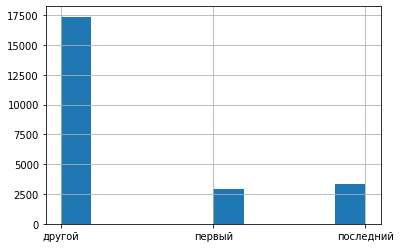

In [22]:
print('Тип этажа квартиры')
data['floors_type'].hist()

#print(data['last_price'].min())

**Вывод по параметрам.**

- на гистограмме `общая площадь` видно преобладание квартир с площадью в районе 50 м2, так же есть экземпляры с площадью больше 200 м2.

- `жилая площадь` находится в дмапазонет от 20 до 75 м2
- `площадь кухни` большинство значений в районе 7 м2
- `цена объекта` можно сказать, что большинство вариантов было продано за 4 млн
- `количество комнат` большинство проданные квартиры - одна и двухокомнатные
- `высота потолков` в районе от 2х до 3х метров
- `этаж квартиры` большинство квартир находились до 5 этажа
- `общее количество этажей в доме`большинстов зданий - пятиэтажные
- `расстояние до центра города в метрах` Заметны несколко выбросов. Первый находится на растоянии 5 км, второй в дмапазоне от 10 да 20 км
- `расстояние до ближайшего аэропорта` большинство значений находится в диапазоне от 10 до 50 км
- `расстояние до ближайшего парка` большинство в районе 500 метров от жилья
- `день публикации объявления` в основном публикуют по будням
- `месяц публикации объявления`большая часть этих орбъявлений опубликована осенью и весной
- `тип этажа квартиры` большинство находится в категории "другие"

**2.Изучене скорости продажи квартир**

(-50.0, 600.0)
count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


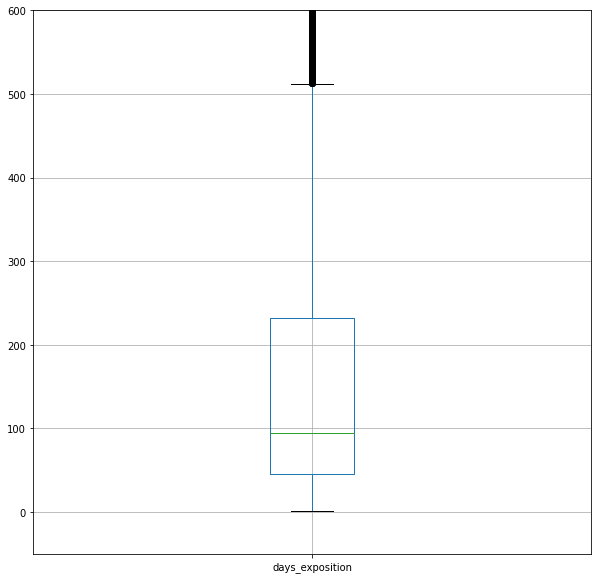

In [56]:
#data['days_exposition'].hist(bins=70, figsize = (15, 10))

boxplot = data.boxplot(column = ['days_exposition'], figsize=(10,10)).set_ylim(-50,600)
print(boxplot)

print(data['days_exposition'].describe())

#print('Среднее время продажи:', data['days_exposition'].mean())
#print('Медианное время продажи:', data['days_exposition'].median())

**Вывод по продажам квартир**

У большинства квартир время продажи составило 2 месяца. Среднее время отличается от медианного, т.к. присутствуют выбросы. Присутствуют квартиры, срок продажи которых превысил 1.5 года.

**3.Изучене факторов, влияющих на стоимость объекта**

In [24]:
display(data.head(60))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_area,weekday,month,year,floors_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254902.0,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180108.0,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151487.0,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,False,False,9.10,0,поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,200694.0,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,349057.0,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,187946.0,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,123853.0,6,2,2017,другой,15.0


0.3631241665984552


<AxesSubplot:title={'center':'от года размещения '}, xlabel='last_price', ylabel='year'>

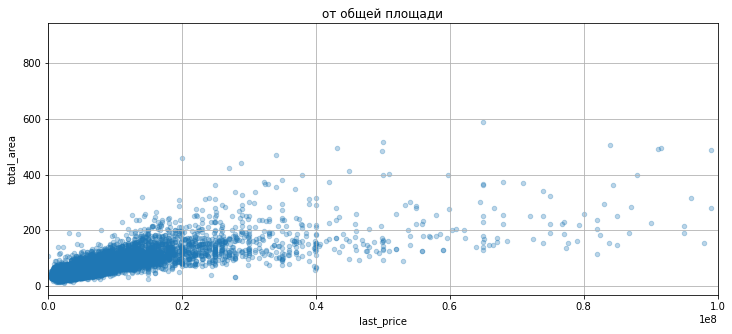

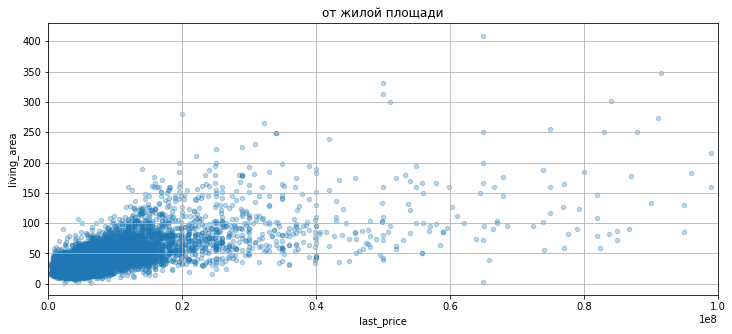

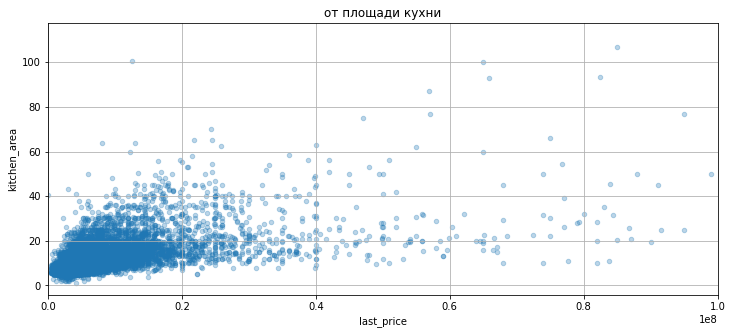

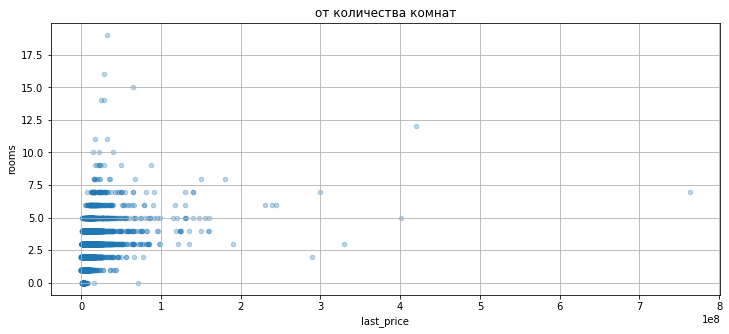

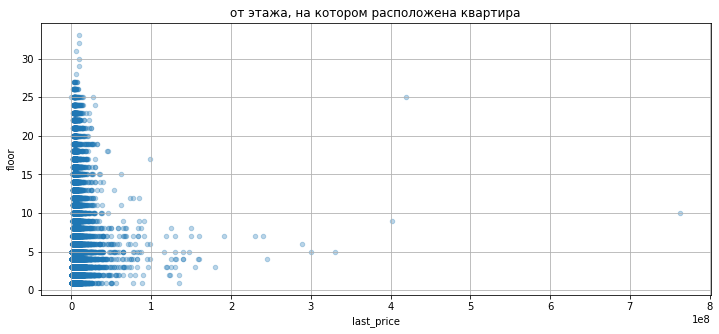

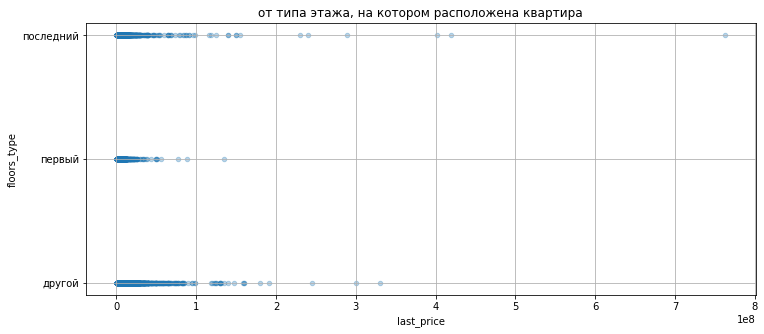

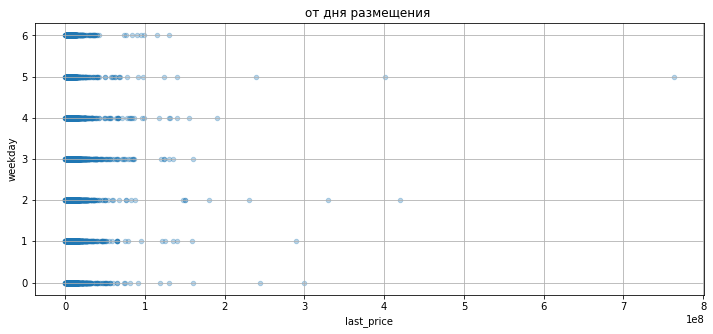

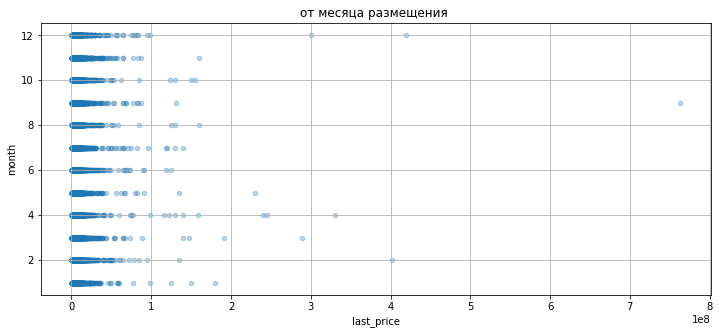

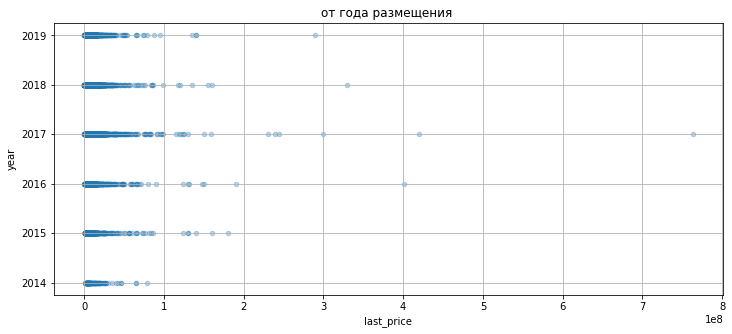

In [65]:
# посмотрим зависимость цены от общей площади квартиры.

#(data.pivot_table(index='last_price', values='total_area', aggfunc = 'count')
    # .plot(x= kind = 'scatter', grid=True, figsize=(12, 5)))
    
data.plot(xlim = (0, 1e8),x= 'last_price', y = 'total_area',title = 'от общей площади',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от жилой площади

data.plot(xlim = (0, 1e8),x= 'last_price', y = 'living_area',title = 'от жилой площади',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от площади кухни

data.plot(xlim = (0, 1e8), x= 'last_price', y = 'kitchen_area',title = 'от площади кухни',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от количества комнат
data.plot(x= 'last_price', y = 'rooms',title = 'от количества комнат',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от этажа, на котором расположена квартира 
data.plot(x= 'last_price', y = 'floor',title = 'от этажа, на котором расположена квартира',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)
# от типа этажа, на котором расположена квартира 
data.plot(x= 'last_price', y = 'floors_type',title = 'от типа этажа, на котором расположена квартира',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от дня размещения 
data.plot(x= 'last_price', y = 'weekday',title = 'от дня размещения ',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от месяца размещения 
data.plot(x= 'last_price', y = 'month',title = 'от месяца размещения ',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

# от года размещения 
data.plot(x= 'last_price', y = 'year',title = 'от года размещения ',
          kind = 'scatter', grid=True, figsize=(12, 5), alpha = 0.3)

In [74]:
# Проверяю корреляцию

print('От общей площади:', data['total_area'].corr(data['last_price']))
print('От жилой площади:', data['living_area'].corr(data['last_price']))
print('От площади кухни:', data['kitchen_area'].corr(data['last_price']))

print('От количества комнат:', data['rooms'].corr(data['last_price']))
print('От этажа, на котором расположена квартира:', data['floor'].corr(data['last_price']))
print('От дня размещения', data['weekday'].corr(data['last_price']))
print('От месяца размещения', data['month'].corr(data['last_price']))


От общей площади: 0.6535810085611219
От жилой площади: 0.5663955721081748
От площади кухни: 0.5200184586898168
От количества комнат: 0.3631241665984552
От этажа, на котором расположена квартира: 0.02664351305636436
От дня размещения 0.0012947242289498442
От месяца размещения 0.0027652326574884056


**Вывод по зависимостям цены**

- от общей площади наблюдается довольно сильная зависимость
- средне от жилой и площади кухни
- ещё в меньшей степени, от количества комнат
- этажи, типы этажей и даты не влияют на цены



**4.Средняя цена одного кв. метра**

In [26]:
#print(data['locality_name'].value_counts().head(10))

#average_price = data.groupby('locality_name').agg({'price_one_area':'mean'}).sort_values(by='price_one_area', ascending=False).round()


#display(average_price.head(10))

#top_10 = data.groupby('locality_name').agg({'locality_name':'count','price_one_area':'mean'})

#top_10.sort_values('locality_name', ascending=False).head(10)


# топ 10 насел пунктов по кол-ву объявлений
top_10_settlements = data['locality_name'].value_counts().iloc[:10].index.to_list()

data_top_10 = data.loc[data['locality_name'].isin(top_10_settlements)]
pivot_data_top_10 = data_top_10.pivot_table(
    index = 'locality_name',
    values = 'price_one_area',
    aggfunc = ['mean','count']).astype('int')

pivot_data_top_10.columns = ['Среднее', 'Колличество объявлений']
pivot_data_top_10 = pivot_data_top_10.sort_values(by = 'Среднее', ascending = False)

display(pivot_data_top_10)




,Среднее,Колличество объявлений
locality_name,,
Санкт-Петербург,214983,14534
поселок Парголово,200718,301
Пушкин,192254,345
деревня Кудрово,188186,262
поселок Мурино,176768,492
поселок Шушары,156236,403
Всеволожск,133545,371
Колпино,132023,328
Гатчина,121748,292


In [31]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15624,5500000.0
поселок Мурино,552,3400000.0
поселок Шушары,439,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
поселок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


In [27]:
# ищу самую низкую и высокую цену по населенным пунктам

price_settlements = data.pivot_table(
    index = 'locality_name',
    values = 'price_one_area')

price_settlements.sort_values(by = 'price_one_area', ascending = False)

,price_one_area
locality_name,
садовое товарищество Новая Ропша,250000.000000
Зеленогорск,218860.166667
Санкт-Петербург,214983.752718
Кудрово,209275.212500
поселок Репино,206260.500000
...,...
поселок Совхозный,22600.000000
поселок Тесово-4,20833.000000
деревня Выскатка,18857.000000


**Вывод 4.Средняя цена одного кв. метра**

- Из топ 10 самая высокая цена за кв. метр это в Санкт-Петербурге 214983 руб за кв.м.
- Самая низкая цена из топ 10 по объявлениям это Выборг. 98981 руб за кв.м
- Самая высокая цена из всех представленных насел пунктов это в садовое товарищество Новая Ропша - 250000
- наименьшая цена за кв. м деревни Малая Романовка - 14808	 

**5.Средняя цена каждого киллометра**



In [77]:
# Некоторые значения в колонке cityCenters_nearest_km равны нулю, и при делении получается inf, что мешает анализу.
# Создам отдельный датафрейм и удалю строки, в которых присутствует 0 значение

data2 = data
data2.drop(data2[data2['cityCenters_nearest_km'] == 0].index, inplace=True)
data2['km_price'] = data2['last_price']/data2['cityCenters_nearest_km']

#display(data2)
# гистограмма распределения цены за киллометр от центра в Петербурге 
#st_peterburg['km_price'].hist(bins = 75, figsize = (15, 10), range = (0, 1.5e6))



Зависимость цены от расстояния -0.2553018251657264


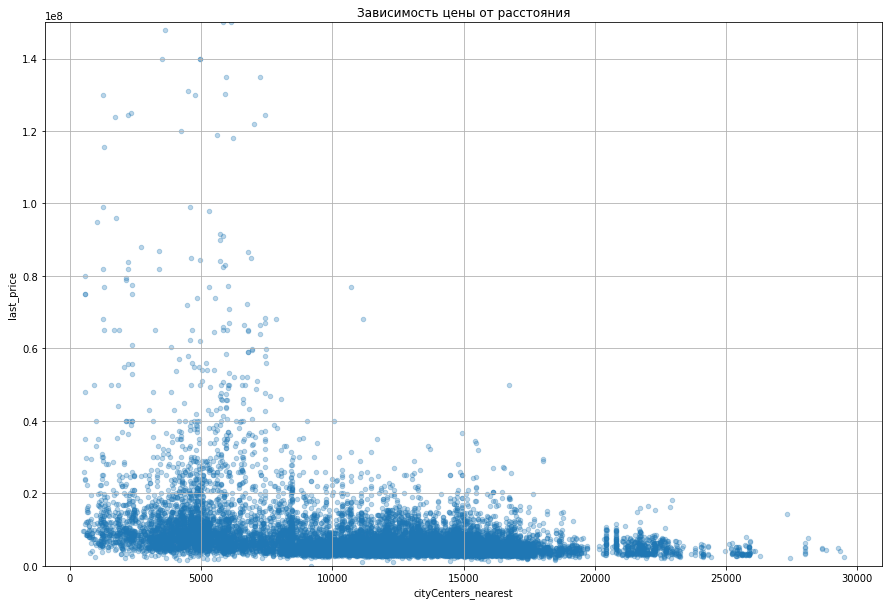

In [81]:
#выделяю питер
st_peterburg = data2[data2['locality_name'] == 'Санкт-Петербург']
st_peterburg.plot(x= 'cityCenters_nearest', y = 'last_price',ylim = (0, 1.5e8), title = 'Зависимость цены от расстояния',
          kind = 'scatter', grid=True, figsize=(15, 10), alpha = 0.3)

print('Зависимость цены от расстояния', st_peterburg['cityCenters_nearest'].corr(st_peterburg['last_price']))

<AxesSubplot:>

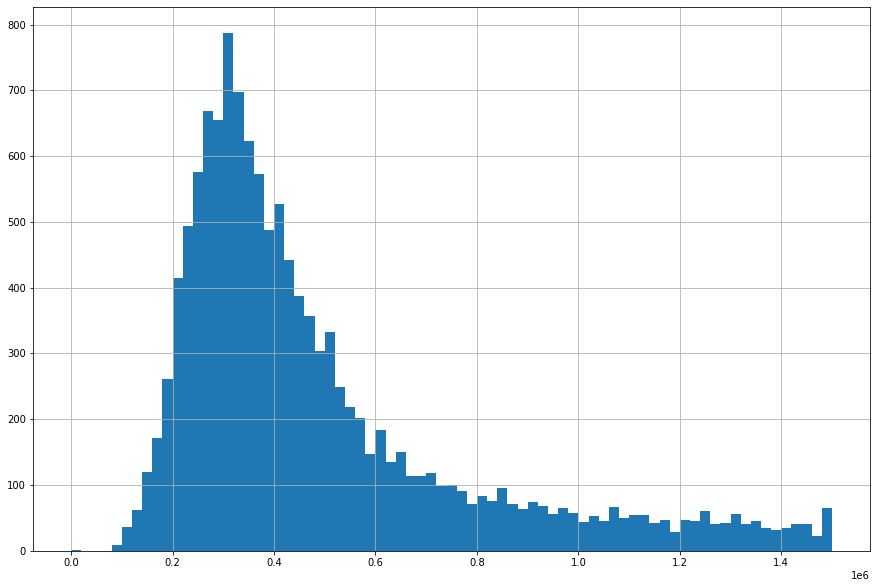

In [79]:
# гистограмма распределения цены за киллометр от центра в Петербурге 
st_peterburg['km_price'].hist(bins = 75, figsize = (15, 10), range = (0, 1.5e6))

**Вывод 5.**

- график зависимости цены от расстояния имеет отрицательный коэффициент Пирсона, из чего можно сделать вывод, что чем больше расстояние от центра тем цена ниже, но уменьшение цены не резкое, т.к. коэффициент не особо большой. 
- по гистограмме распределения цены за киллометр от центра в Петербургеб можно сказать, что большинство значений лежит в диапахоне от 200 т.р. за км, до 500 т.р. за км.

### Общий вывод

**По данным**

- были заполнены пропущенные значения в некоторых столбцах
- в некоторых столбцах был указан неверный тип данных
- было удалено 43 неявных дубликата в названии насел пунктов

**По исследованиям**

- большинство квартир продаются за 2 - 3 месяца
- стоимость зависит от жил. площади и площади отдельных комнат, чем выше, тем цена боьше
- со временем цена объекта растёт
- цены объектов зависят от насел. пунктов и дистанции до центра

**Рекомендации для площадки объявлений**

- стандартизировать название населённых пунктов, чтобы сократить число неявных дубликатов
- если не указывают наличие балкона, то автоматически проставлять 0, т.к. скорей-всего он отсутствует
- очень много пропущенных значений в категориях, содержащих наличие водоёмов, парков и расстояния до них. Попробуйте как-то автоматизировать заполнение, например зная адрес продажи, можно написать программу, которая сама будет расчитывать эти данные
- так же можно поступить с классификацией объекта, как апартамент и расчётом высоты потолков (в зданиях обычно они одинаковой высоты).